<a href="https://colab.research.google.com/github/Yoyo030807/5220_assignments/blob/main/Module_4_Working_with_Textual_Data_with_NLTK_Part_II(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 4: Working with Textual Data with NLTK Part II (10 Points).


In this tutorial, we will:
1. Explore the development of word2vec embedding of word tokens.
2. A shallow taste of the PyTorch framework for deep learning.


**Note: There is an associated submission for this exercise.**

Let's still start with the `examp_doc` we have used in last tutorial. Alternatively, you can replace it with other paragraphs.

In [1]:
import nltk

In [2]:
# Trick: use triple quotes (""" ...... """) to define multi-line texts in Python.

examp_doc = """Growing use of the Internet and social media in the past decade has led to an explosion in the amount of
social and behavioral data available to researchers. This in turn has created huge opportunities for social scientists to
study human behavior and social interaction in unprecedented detail. Leveraging these opportunities requires collaborative,
interdisciplinary efforts involving computer and information scientists, physicists, and mathematicians who know how to
build the telescope and economists, political scientists, and sociologists who know where to aim it. Computational social
science exists at the intersection of these varied disciplines."""


print(examp_doc)

Growing use of the Internet and social media in the past decade has led to an explosion in the amount of 
social and behavioral data available to researchers. This in turn has created huge opportunities for social scientists to 
study human behavior and social interaction in unprecedented detail. Leveraging these opportunities requires collaborative, 
interdisciplinary efforts involving computer and information scientists, physicists, and mathematicians who know how to 
build the telescope and economists, political scientists, and sociologists who know where to aim it. Computational social 
science exists at the intersection of these varied disciplines.


#### Tokenize the document.

**Exercise 1** Use below code cell to convert the document into a list of tokens. Each token should:
- split the paragraph into sentences
- for each sentence, further split them into individual words.
- turn all words into lower cases (i.e., "a" insteand of "A")
- remove stop words.
- remove punctuations.
- stem to the root.

You can add a cell box below and test the code line by line before writing the function.

In [4]:
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Added to download the missing resource
stemmer = nltk.stem.PorterStemmer()
stopword_lst = nltk.corpus.stopwords.words('english')
punct_lst = '''!()-[]{};:\'"\\,<>./?@#$%^&*_~''' # Escaped the backslash

def clean_and_tokenize(examp_doc):
    # write down the corresponding procedures.
    # the six lines correspond to six steps.

    out = nltk.sent_tokenize(examp_doc)
    out = [nltk.word_tokenize(sent) for sent in out]
    out = [[word.lower() for word in sent] for sent in out]
    out = [[word for word in sent if word not in stopword_lst] for sent in out]
    out = [[word for word in sent if word not in punct_lst] for sent in out]
    out = [[stemmer.stem(word) for word in sent] for sent in out]

    return out


token_lsts = clean_and_tokenize(examp_doc)
print(token_lsts)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[['grow', 'use', 'internet', 'social', 'media', 'past', 'decad', 'led', 'explos', 'amount', 'social', 'behavior', 'data', 'avail', 'research'], ['turn', 'creat', 'huge', 'opportun', 'social', 'scientist', 'studi', 'human', 'behavior', 'social', 'interact', 'unpreced', 'detail'], ['leverag', 'opportun', 'requir', 'collabor', 'interdisciplinari', 'effort', 'involv', 'comput', 'inform', 'scientist', 'physicist', 'mathematician', 'know', 'build', 'telescop', 'economist', 'polit', 'scientist', 'sociologist', 'know', 'aim'], ['comput', 'social', 'scienc', 'exist', 'intersect', 'vari', 'disciplin']]


### 1. Bag-of-Word (BoW) Encoding

This section will experiment the creation of BoW with the provided "examp_doc".

   1. The *first* step is to clean and prepare the data, which we have already done with the function `clean_and_tokenize()`, and the output is `token_lsts`.

   2. Then the *second* step is to create a vocabulary, consisting all unique words in the document. Please check and run the below code to achieve this step.

In [5]:
vocab_lst = sorted(list(set([token for token_lst in token_lsts for token in token_lst])))
print(vocab_lst)

['aim', 'amount', 'avail', 'behavior', 'build', 'collabor', 'comput', 'creat', 'data', 'decad', 'detail', 'disciplin', 'economist', 'effort', 'exist', 'explos', 'grow', 'huge', 'human', 'inform', 'interact', 'interdisciplinari', 'internet', 'intersect', 'involv', 'know', 'led', 'leverag', 'mathematician', 'media', 'opportun', 'past', 'physicist', 'polit', 'requir', 'research', 'scienc', 'scientist', 'social', 'sociologist', 'studi', 'telescop', 'turn', 'unpreced', 'use', 'vari']


In [6]:
token_lsts[0]

['grow',
 'use',
 'internet',
 'social',
 'media',
 'past',
 'decad',
 'led',
 'explos',
 'amount',
 'social',
 'behavior',
 'data',
 'avail',
 'research']

<span style='background-color: #FFFF00;'> **Question:** what is the dimension for the one-hot word encoding derived from this vocabulary? (**1 Point**) </span>


**Answer:** The dimension for the one-hot word encoding derived from this vocabulary is 46.

3. The *third* step is to convert each documents (i.e., each sentence in `exemp_doc` or each list in `token_lsts`) into the BoW encoding. Write the function in the below code cell to achieve this.

In [7]:
## finish the code in this step.
import numpy as np

def tokenLst_to_BOW(token_lsts, vocabList):
    # for each token in vocabList, count its frequency in the token list representing the original sentnece.
    out = []

    for tokenLst in token_lsts:
        bow_embedding = []
        for word in vocabList:
            bow_embedding.append(tokenLst.count(word))
        out.append(bow_embedding)

    return out

bow_encoding = tokenLst_to_BOW(token_lsts, vocab_lst)

[print(bow_encoding[i]) for i in range(4)]

[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0]
[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]


[None, None, None, None]

Bag of Words (BOW) encoding can be utilized to analyze the similarity among texts by comparing the frequency distribution of various words. Therefore, BOW encoding can serve as input for NLP tasks that inherently rely on similarity scores, such as document classification (e.g., determining the category of news articles), topic modeling, and latent semantic analysis.

Below just showed a simple example for comparing similarity of the four sentences in the `exemp_doc` with the [`cosine_similarity`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) function in sklearn. Based on the results, it can be inferred that the first and second sentences are the most alike, with a cosine similarity score of 0.31.

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

print(cosine_similarity((bow_encoding)))

[[1.         0.31311215 0.         0.1833397 ]
 [0.31311215 1.         0.15491933 0.19518001]
 [0.         0.15491933 1.         0.07559289]
 [0.1833397  0.19518001 0.07559289 1.        ]]


<span style='background-color: #FFFF00;'> **Exercise:** In below code cell, write the function to convert BoW encoding (a list of lists) into TF-IDF encoding. (**3 Points**) </span>
- The input is BOW encoding.
- The output is tf-idf encoding.

<div>
<img src="attachment:image-2.png" align="center" width="400">
<img src="attachment:image-3.png" align="center" width="300">
<img src="attachment:image.png" align="center" width="300">
</div>

In [12]:
import math

def bow_to_tfidf(bow_encoding):
    # write your code below

    # Step 0: Handle edge cases and get dimensions
    if not bow_encoding:
        return []

    num_documents = len(bow_encoding)
    # Assume all docs have the same vocab size from the BoW matrix
    num_terms = len(bow_encoding[0]) if num_documents > 0 else 0

    if num_terms == 0:
        # Return a list of empty lists for each document
        return [[] for _ in range(num_documents)]

    # Step 1: Calculate TF (Term Frequency)
    # TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)

    tf_matrix = []
    for doc_counts in bow_encoding:
        total_words_in_doc = sum(doc_counts)

        if total_words_in_doc == 0:
            # Avoid division by zero if the document is empty
            tf_doc = [0.0] * num_terms
        else:
            # Calculate TF for each term in the document
            tf_doc = [count / total_words_in_doc for count in doc_counts]

        tf_matrix.append(tf_doc)

    # Step 2: Calculate IDF (Inverse Document Frequency)
    # First, we need the Document Frequency (df) for each term
    # df(t) = number of documents that contain term t

    df = [0] * num_terms
    for doc_counts in bow_encoding:
        for t_index in range(num_terms):
            # If term t has a count > 0, it's in this document
            if doc_counts[t_index] > 0:
                df[t_index] += 1

    # Now, calculate the IDF score for each term using the common formula
    # IDF(t) = log((1 + N) / (1 + df(t))) + 1
    # N = num_documents
    # We add 1 (smoothing) to avoid division by zero and match common library standards

    idf_vector = []
    for t_index in range(num_terms):
        numerator = 1 + num_documents
        denominator = 1 + df[t_index]
        idf_score = math.log(numerator / denominator) + 1
        idf_vector.append(idf_score)

    # Step 3: Calculate TF-IDF
    # TF-IDF(t, d) = TF(t, d) * IDF(t)

    tfidf_encoding = []
    for d_index in range(num_documents):
        tfidf_doc = []
        for t_index in range(num_terms):
            # Multiply the TF score by the IDF score for each term
            score = tf_matrix[d_index][t_index] * idf_vector[t_index]
            tfidf_doc.append(score)
        tfidf_encoding.append(tfidf_doc)

    return tfidf_encoding

bow_to_tfidf(bow_encoding)

[[0.0,
  0.12775271545827702,
  0.12775271545827702,
  0.10072170825106605,
  0.0,
  0.0,
  0.0,
  0.0,
  0.12775271545827702,
  0.12775271545827702,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.12775271545827702,
  0.12775271545827702,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.12775271545827702,
  0.0,
  0.0,
  0.0,
  0.12775271545827702,
  0.0,
  0.0,
  0.12775271545827702,
  0.0,
  0.12775271545827702,
  0.0,
  0.0,
  0.0,
  0.12775271545827702,
  0.0,
  0.0,
  0.16308580684189464,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.12775271545827702,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.11621735567430698,
  0.0,
  0.0,
  0.0,
  0.14740697937493502,
  0.0,
  0.0,
  0.14740697937493502,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.14740697937493502,
  0.14740697937493502,
  0.0,
  0.14740697937493502,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.11621735567430698,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.11621735567430698,
  0.18817593097141688,
  0.0,
  0.14740697937493502,
  0.0,

### 2. Word2Vec Embedding.

[`PyTorch`](https://pytorch.org/), developed by Facebook's Artificial Intelligence Research group (FAIR), is a powerful library for building deep learning networks. It provides implementations of many commonly-used network layers. The process of building a deep learning network is akin to building with blocks (搭积木). When building with blocks, you arrange each block to create an overall appealing structure. Similarly, when building a deep learning model, you arrange the different layers to optimize its efficiency.

![image-3.png](attachment:image-3.png)

We will use PyTorch to implement the Continuous Bag-of-Words (CBOW) model we have learnt in the lecture session. To start, we need to prepare the original file `exemp_doc` into bag-of-words. You can run the below code cell to prepare the data.

Please also be noted that the CBOW embedding and BOW encoding (or one-hot encoding) are two different things.

In [13]:
context_size = 2

data = []

for sent in token_lsts:
    for i in range(context_size, len(sent)-2):
        context = (sent[i-2], sent[i-1], sent[i+1], sent[i+2])
        target = sent[i]
        data.append((context, target))


[print(data[i]) for i in range(len(data))]
print(len(data))

(('grow', 'use', 'social', 'media'), 'internet')
(('use', 'internet', 'media', 'past'), 'social')
(('internet', 'social', 'past', 'decad'), 'media')
(('social', 'media', 'decad', 'led'), 'past')
(('media', 'past', 'led', 'explos'), 'decad')
(('past', 'decad', 'explos', 'amount'), 'led')
(('decad', 'led', 'amount', 'social'), 'explos')
(('led', 'explos', 'social', 'behavior'), 'amount')
(('explos', 'amount', 'behavior', 'data'), 'social')
(('amount', 'social', 'data', 'avail'), 'behavior')
(('social', 'behavior', 'avail', 'research'), 'data')
(('turn', 'creat', 'opportun', 'social'), 'huge')
(('creat', 'huge', 'social', 'scientist'), 'opportun')
(('huge', 'opportun', 'scientist', 'studi'), 'social')
(('opportun', 'social', 'studi', 'human'), 'scientist')
(('social', 'scientist', 'human', 'behavior'), 'studi')
(('scientist', 'studi', 'behavior', 'social'), 'human')
(('studi', 'human', 'social', 'interact'), 'behavior')
(('human', 'behavior', 'interact', 'unpreced'), 'social')
(('behavior

CBOW predicts the word with its contextual words. For example, predicting "*internet*" based on the list of words: ["*grow*", "*use*", "*social*", "*media*"].


**A shallow taste of deep learning**

In our lecture session, we have explained the principle of Word2Vec embeddings. Below code cell presents a simple deep learning model, written with PyTorch, for Continuous Bag-of-Words (CBOW). The corresponding network structure is also provided in Figure 1.


<div>
<img src="attachment:image-2.png" align="center" width="700">
</div>

**Figure 1**. The network structure of CBOW.

Some online documents in PyTorch you may find helpful:
- [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html)
- [`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
- [`F.log_softmax`](https://pytorch.org/docs/stable/generated/torch.nn.functional.log_softmax.html)

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F   # load necessary packages & functions from PyTorch


class CBOW(nn.Module): # define the class "CBOW", which is a child class derived from the parent class: "nn.Module"

    def __init__(self, vocab_size, embedding_dim=5, hidd_dim = 16, context_size = 2):
        super(CBOW, self).__init__() # the "CBOW" class inherits all properties and methods from its parent class.

        # initialize the embedding layer.
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)

        # Define the first fully connected layer (linear transformation) which takes the concatenated embeddings as input
        self.linear1 = nn.Linear(context_size * embedding_dim, hidd_dim)

        # Define the second fully connected layer which outputs scores for each word in the vocabulary
        self.linear2 = nn.Linear(hidd_dim, vocab_size)

    def forward(self, inputs): # Define the forward pass of the network
        embeds = self.embeddings(inputs) # Get the embeddings for the input words

        # Flatten the embeddings (from context_size x embedding_dim to a single vector)
        out = embeds.view((1, -1))

        # Pass the flattened embeddings through the first linear layer
        out = self.linear1(out)

        # Pass the output of the first linear layer through the second linear layer
        out = self.linear2(out)

        # Apply log softmax to get log probabilities for each word in the vocabulary
        log_probs = F.log_softmax(out, dim=1)

        return(log_probs) # Return the log probabilities

<span style='background-color: #FFFF00;'> Please carefully review Figure 1 and the 13-line PyTorch code. Analyze the code and answer the following questions (**4 Points**).</span>

---
**Q1:** which line of the code correspond to the "Embedding Layer" on the figure, and what is the dimension of inputs and outputs for that layer?

**A1:** **Line**: self.embeddings = nn.Embedding(vocab_size, embedding_dim) (Line 8 in the __init__ method, where the layer is defined).

**Input Dimension**: The input (inputs in the forward method) is a 1D tensor of word indices. Based on the context_size=2 parameter, its shape is (context_size,), which is (2,).

**Output Dimension**: The output (embeds) is a 2D tensor of shape (context_size, embedding_dim), which is (2, 5).

---

**Q2:** which line of the code correspond to the "1st Linear Layer" on the figure, and what is the dimension of inputs and outputs for that layer?

**A2:**
**Line**: self.linear1 = nn.Linear(context_size * embedding_dim, hidd_dim) (Line 11).

**Input Dimension**: The input features are context_size * embedding_dim = 2 * 5 = 10. (This corresponds to the flattened embeds.view(1, -1) tensor, which has a shape of (1, 10)).

**Output Dimension**: The output features are hidd_dim = 16. (The layer outputs a tensor of shape (1, 16)).

---

**Q3:** which line of the code correspond to the "2nd Linear Layer" on the figure, and what is the dimension of inputs and outputs for that layer?

**A3:**
**Line**: self.linear2 = nn.Linear(hidd_dim, vocab_size) (Line 14).

**Input Dimension**: The input features are hidd_dim = 16. (This corresponds to the output tensor from self.linear1, which has a shape of (1, 16)).

**Output Dimension**: The output features are vocab_size. (The layer outputs a tensor of shape (1, vocab_size)).

---
**Q4:** what is the purpose of the softmax?

**A4:** The purpose of the softmax function (or log_softmax as used in the code) is to convert the network's final raw output scores (also called "logits") into a probability distribution. It rescales the scores for every word in the vocabulary so that each score is between 0 and 1, and all scores sum up to 1. This allows the output to be interpreted as the probability of each word being the correct target word.

---

Run below code cell to train the model and check the loss curve.

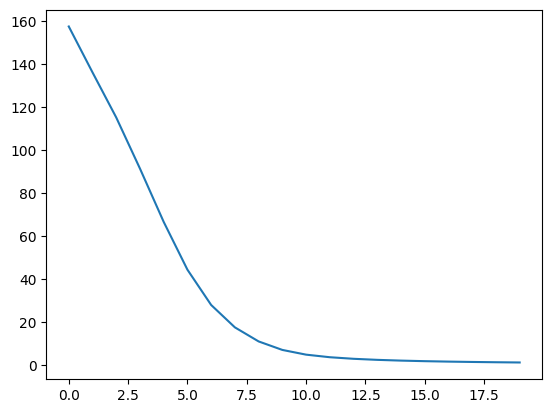

In [16]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F   # load necessary packages & functions from PyTorch


class CBOW(nn.Module): # define the class "CBOW", which is a child class derived from the parent class: "nn.Module"

    def __init__(self, vocab_size, embedding_dim=5, hidd_dim = 16, context_size = 2):
        super(CBOW, self).__init__() # the "CBOW" class inherits all properties and methods from its parent class.

        # initialize the embedding layer.
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)

        # Define the first fully connected layer (linear transformation) which takes the concatenated embeddings as input
        self.linear1 = nn.Linear(context_size * embedding_dim, hidd_dim)

        # Define the second fully connected layer which outputs scores for each word in the vocabulary
        self.linear2 = nn.Linear(hidd_dim, vocab_size)

    def forward(self, inputs): # Define the forward pass of the network
        embeds = self.embeddings(inputs) # Get the embeddings for the input words

        # Flatten the embeddings (from context_size x embedding_dim to a single vector)
        out = embeds.view((1, -1))

        # Pass the flattened embeddings through the first linear layer
        out = self.linear1(out)

        # Pass the output of the first linear layer through the second linear layer
        out = self.linear2(out)

        # Apply log softmax to get log probabilities for each word in the vocabulary
        log_probs = F.log_softmax(out, dim=1)

        return(log_probs) # Return the log probabilities


def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    return torch.tensor(idxs, dtype=torch.long)

# Create a dictionary mapping each word to its index in the vocabulary, as nn.Embedding layer only takes indices.
word_to_ix = {word: i for i, word in enumerate(vocab_lst)}

losses = []
loss_function = nn.NLLLoss() # Define the loss function to be used (Negative Log Likelihood Loss)

model = CBOW(len(vocab_lst), embedding_dim=5, context_size=4) # Initialize the CBOW model with necessary inputs.

optimizer = optim.SGD(model.parameters(), lr=0.05)  # Define the optimizer and learning rate to update the model's parameters.


for epoch in range(20):
    total_loss = 0 # Initialize the total loss for the current epoch
    for context, target in data: # Iterate over each context-target pair in the dataset
        context_ids = make_context_vector(context, word_to_ix) # Convert the context words to their corresponding indices and create a tensor
        model.zero_grad() # Zero out the gradients from previous steps

        log_probs = model(context_ids) # Forward pass: get the log probabilities for the target word given the context

        label = torch.tensor([word_to_ix[target]], dtype=torch.long) # Create a tensor for the target word's index

        loss = loss_function(log_probs, label) # Calculate the loss between the predicted log probabilities and the actual target
        loss.backward() # Backward pass: compute gradients of the loss with respect to the model's parameters

        optimizer.step() # Update the model's parameters using the optimizer
        total_loss += loss.item() # Accumulate the loss for the current epoch
    losses.append(total_loss) # Append the total loss for the current epoch to the losses list


# Plot the loss values over the epochs using matplotlib

plt.plot(range(20), losses)

In [17]:
# check the dense embedding for the first word aim""

model.embeddings(torch.tensor(0))

tensor([-1.1191,  0.1065,  1.3731, -1.7975, -0.4363],
       grad_fn=<EmbeddingBackward0>)

/tmp/ipython-input-2299828921.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob = F.softmax(out).detach().numpy()[0]


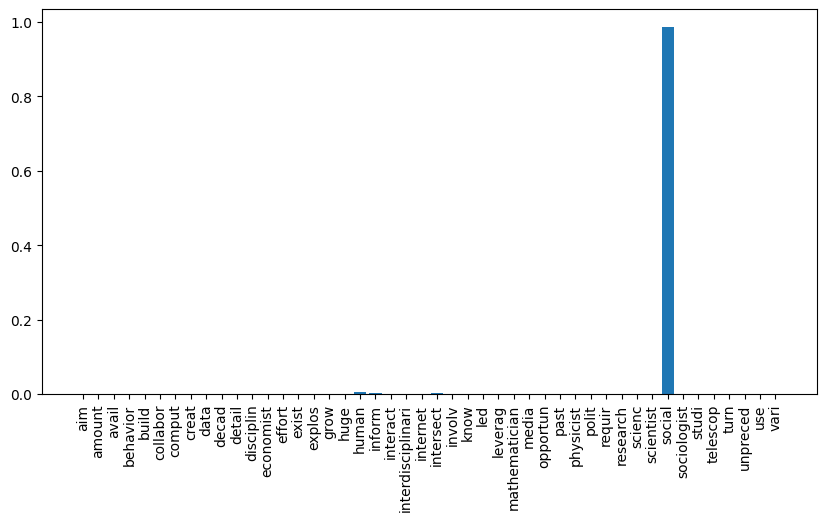

In [18]:
context, targrt = data[1]
context_ids = make_context_vector(context, word_to_ix)

out = model.embeddings(context_ids)
out = out.view((1, -1))
out = model.linear1(out)
out = model.linear2(out)
prob = F.softmax(out).detach().numpy()[0]

plt.figure(figsize = (10, 5))
plt.bar(vocab_lst, prob)
plt.xticks(rotation = 90)
plt.show()

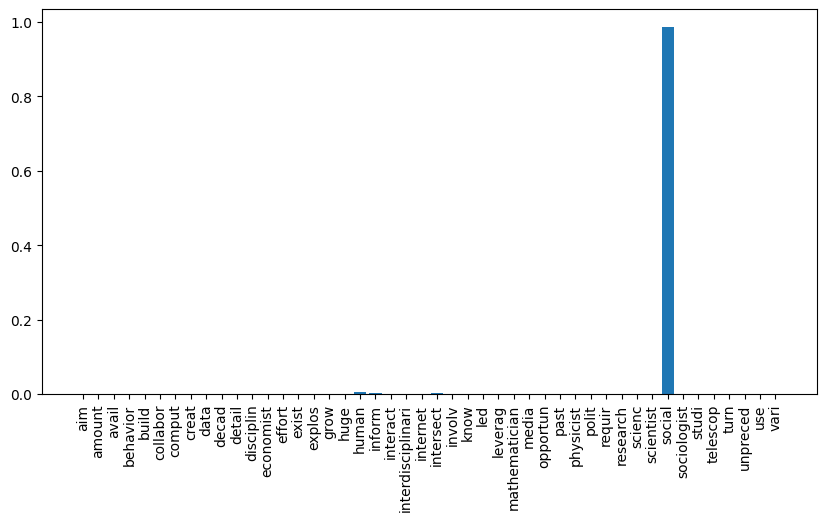

In [22]:
# step 1: embedding
out = model.embeddings(context_ids)

# 2. faltten
out = out.view((1, -1))

# 3. first linear layer:

out = model.linear1(out)

# 4. second linear layer:
out = model.linear2(out)

# 5. softmax

prob = F.softmax(out, dim=1).detach().numpy()[0] # output the probability of the target word.

plt.figure(figsize = (10, 5))
plt.bar(vocab_lst, prob)
plt.xticks(rotation = 90)
plt.show()

{'aim': 0,
 'amount': 1,
 'avail': 2,
 'behavior': 3,
 'build': 4,
 'collabor': 5,
 'comput': 6,
 'creat': 7,
 'data': 8,
 'decad': 9,
 'detail': 10,
 'disciplin': 11,
 'economist': 12,
 'effort': 13,
 'exist': 14,
 'explos': 15,
 'grow': 16,
 'huge': 17,
 'human': 18,
 'inform': 19,
 'interact': 20,
 'interdisciplinari': 21,
 'internet': 22,
 'intersect': 23,
 'involv': 24,
 'know': 25,
 'led': 26,
 'leverag': 27,
 'mathematician': 28,
 'media': 29,
 'opportun': 30,
 'past': 31,
 'physicist': 32,
 'polit': 33,
 'requir': 34,
 'research': 35,
 'scienc': 36,
 'scientist': 37,
 'social': 38,
 'sociologist': 39,
 'studi': 40,
 'telescop': 41,
 'turn': 42,
 'unpreced': 43,
 'use': 44,
 'vari': 45}

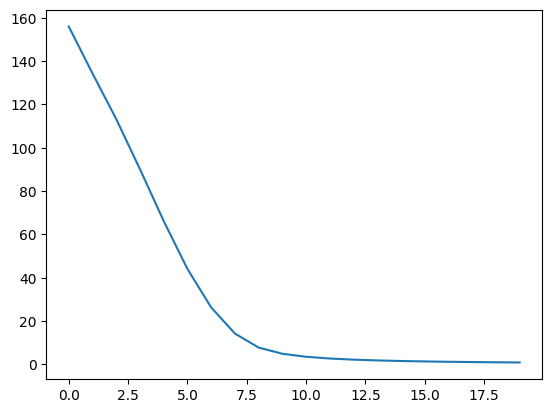

In [23]:
import matplotlib.pyplot as plt

def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    return torch.tensor(idxs, dtype=torch.long)

# Create a dictionary mapping each word to its index in the vocabulary, as nn.Embedding layer only takes indices.
word_to_ix = {word: i for i, word in enumerate(vocab_lst)}

losses = []
loss_function = nn.NLLLoss() # Define the loss function to be used (Negative Log Likelihood Loss)

model = CBOW(len(vocab_lst), embedding_dim=5, context_size=4) # Initialize the CBOW model with necessary inputs.

optimizer = optim.SGD(model.parameters(), lr=0.05)  # Define the optimizer and learning rate to update the model's parameters.


for epoch in range(20):
    total_loss = 0 # Initialize the total loss for the current epoch
    for context, target in data: # Iterate over each context-target pair in the dataset
        context_ids = make_context_vector(context, word_to_ix) # Convert the context words to their corresponding indices and create a tensor
        model.zero_grad() # Zero out the gradients from previous steps

        log_probs = model(context_ids) # Forward pass: get the log probabilities for the target word given the context

        label = torch.tensor([word_to_ix[target]], dtype=torch.long) # Create a tensor for the target word's index

        loss = loss_function(log_probs, label) # Calculate the loss between the predicted log probabilities and the actual target
        loss.backward() # Backward pass: compute gradients of the loss with respect to the model's parameters

        optimizer.step() # Update the model's parameters using the optimizer
        total_loss += loss.item() # Accumulate the loss for the current epoch
    losses.append(total_loss) # Append the total loss for the current epoch to the losses list


# Plot the loss values over the epochs using matplotlib

plt.plot(range(20), losses)

### 3. Sentence Embedding with SentenceBERT

In [31]:
from sentence_transformers import SentenceTransformer
from numpy.linalg import norm

cos_sim = lambda a,b: (a @ b.T) / (norm(a)*norm(b))
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

embeddings = model.encode(['今天天气怎么样呀', '今天心情好极了', '计算社会科学太容易了'] )

In [32]:
cosine_similarity(embeddings)

array([[1.        , 0.85986626, 0.42122194],
       [0.85986626, 1.0000001 , 0.39542288],
       [0.42122194, 0.39542288, 1.0000002 ]], dtype=float32)

#### Want to Know More about word embedding?

In this simple exercise, we used a very simple corpus. It only includes one paragraph. Also, we set the embedding dimension to be 3 for easy visualization. The result is not very accurate.

Some institutions or scholars have trained word embeddings from billions of documents. Those pre-trained word embeddings can be downloaded online. They also provide different options for the embedding dimension, e.g., 100 or 200. You can check the following link for more information:

- [Google Word2Vec](https://code.google.com/archive/p/word2vec/)
- [Standford GloVe](https://nlp.stanford.edu/projects/glove/)

### 4. Other application of NLP approaches.

We have introduced different NLP methods in this session, some of which can be applied to tasks beyound text processing. Below shows you a pesudo scenario.

The classification of occupations (职业) normally follows a top-down manner. For instance, China has defined 8 general occupation types, each further subdivided into more specific categories [[ref]](https://oss.baigongbao.com/2021/07/18/BkANmPhfNr.pdf). However, due to the rapid evolution of society, new occupation types often emerge that do not fit into existing categories. As a research assistant, you have been tasked with classifying these new occupations into the existing categories. To accomplish this, you recall the concept of "embedding" from your CSS 5220 class. You decide to create embeddings for each occupation type and use similarity measures to match new occupations to existing categories.

There are various methods to achieve this, an intuitive one is to create embeddings based on job advertisement texts. Unfortunately, your advisor does not have access to this type of data. Instead, he provides you with user-based data, consisting of 1,000 job applicants and the jobs each applicant has applied for. Below shows two exemplary records of the data:

    1. {'name': '张三', 'jobs_applied': ['数据分析师'，'机器学习工程师'，'产品经理'，'数据运营']}
    2. {'name': '李四', 'jobs_applied': ['服务员'，'前台'，'销售助理'，'办公室文员'，'零售店员']}

Therefore, the question becomes: how can you create embeddings for occupations based on this available data?

<span style='background-color: #FFFF00;'> Please read the above question and document the steps that you will take to solve the question (**2 Points**).</span>

(**Hint**: I expect you use Word2Vec embedding)

---



**Answer:**
The core idea is to treat each applicant's list of applied-for jobs as a "sentence" and each unique occupation title as a "word".

**Step 1: Data Preparation**
First, we must transform the applicant data into a format that a Word2Vec model can understand (a list of lists, or a "corpus").

Initialize an empty list, let's call it corpus.

Iterate through the 1,000 applicant records provided.

For each applicant, extract their jobs_applied list.

Append this list of jobs directly to our corpus.

After this step, corpus will be a list of 1,000 "sentences". For example, based on the two samples provided, our corpus would look like this:

[
  ['数据分析师', '机器学习工程师', '产品经理', '数据运营'],
  ['服务员', '前台', '销售助理', '办公室文员', '零售店员'],
  ... (998 more lists) ...
]


**Step 2: Train the Word2Vec Model**

Now that we have our data in the correct format, we can train the Word2Vec model (e.g., using the gensim library).

Import the Word2Vec model: from gensim.models import Word2Vec.

Instantiate and train the model on our corpus:
model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

corpus: The list of lists we prepared in Step 1.

vector_size: The dimension of the embedding we want to create for each occupation (e.g., 100).

window: This defines the "context". A window of 5 means that for a given job, the model will look at other jobs within the same list (up to 5 "words" away, though in this case, the order doesn't matter as much as co-occurrence). This co-application behavior is what creates the "context".

min_count=1: Ensures that every occupation (even rare ones) gets an embedding.

**Step 3: Extract and Use Occupation Embeddings**

Once the model is trained, it contains a vector (embedding) for every unique occupation title found in the data.

Get an Embedding: We can access the embedding for any specific occupation using the model's vocabulary:
embedding_for_data_analyst = model.wv['数据分析师']

Solve the Problem (Classification): To classify a "new occupation" (e.g., '机器学习工程师') into an "existing category" (e.g., represented by '数据分析师'), we can now use similarity measures.

Calculate the cosine similarity between the embeddings of the two occupations:
similarity = model.wv.similarity('机器学习工程师', '数据分析师')

By comparing the "new occupation's" embedding to the embeddings of all existing categories, we can classify it into the category with the highest similarity score.

This method successfully creates meaningful embeddings for occupations based on user behavior (which jobs are applied for together) rather than job descriptions.


----

In [34]:
# Import Word2Vec module
from gensim.models import Word2Vec
import warnings

# Ignore warnings that may appear during gensim training
warnings.filterwarnings("ignore", category=FutureWarning)

# Step 1: Prepare the Corpus
# Assume this is our applicant data, we just use a few examples for demonstration
# Each list represents an applicant's "application history", just like a "sentence"
corpus = [
    # Applicant A (Technical roles)
    ['数据分析师', '机器学习工程师', '产品经理', '数据运营'],
    # Applicant B (Service/Admin roles)
    ['服务员', '前台', '销售助理', '办公室文员', '零售店员'],
    # Applicant C (Technical roles)
    ['数据分析师', 'Python工程师', '数据运营', '数据科学家'],
    # Applicant D (Service/Admin roles)
    ['前台', '行政助理', '办公室文员', '人事助理'],
    # Applicant E (Mixed roles, tech-leaning)
    ['产品经理', '数据分析师', '项目经理'],
    # Applicant F (Mixed roles, sales-leaning)
    ['销售助理', '产品经理', '市场专员'],
    # Applicant G (Technical roles)
    ['机器学习工程师', '数据科学家', '算法工程师'],
    # Applicant H (Service roles)
    ['零售店员', '收银员', '服务员']
]

print("Prepared Corpus (First 5 entries)")
for i, sentence in enumerate(corpus[:5]):
    print(f"Applicant {i+1}: {sentence}")
print("...\n")

# Step 2: Train the Word2Vec Model
# We use a very small vector dimension (vector_size=10) just for this demo
# window=2: In the same list, one "job" will consider the 2 jobs before and after it as context
# min_count=1: Ensures that every job that appears will have a vector calculated
# sg=1: Use the Skip-Gram algorithm (this fits the "context" concept better)
print("Starting Word2Vec Model Training")
model = Word2Vec(corpus, vector_size=10, window=2, min_count=1, workers=1, sg=1)
print("Model training complete!\n")

# Step 3: Extract and Use Occupation Embeddings

print("1. View the vector for a specific job")
job_title = '数据分析师'
# model.wv contains all the word vectors
job_vector = model.wv[job_title]
print(f"Vector for '{job_title}' (dimension={len(job_vector)}):")
# Print the first 5 numbers of the vector
print(f"{job_vector[:5]} ...\n")

print("2. Compare the similarity between two jobs")
job_1 = '数据分析师'
job_2 = '机器学习工程师'
# Calculate the cosine similarity between the two vectors
similarity_tech = model.wv.similarity(job_1, job_2)
print(f"Similarity between '{job_1}' and '{job_2}':")
print(f"-> {similarity_tech:.4f} (We expect this value to be high, as they are related technical roles)\n")

job_3 = '服务员'
similarity_mixed = model.wv.similarity(job_1, job_3)
print(f"Similarity between '{job_1}' and '{job_3}':")
print(f"-> {similarity_mixed:.4f} (We expect this value to be low, as they are unrelated)\n")

# 3. Find the most related jobs (The key to solving the problem)
target_job = '产品经理'
print(f"4. Find jobs most similar to '{target_job}' ")
# topn=3 means find the top 3 most similar
similar_jobs = model.wv.most_similar(target_job, topn=3)
for job, score in similar_jobs:
    print(f"Job: {job}, Similarity: {score:.4f}")
print("\n")

target_job_2 = '前台'
print(f"5. Find jobs most similar to '{target_job_2}'")
similar_jobs_2 = model.wv.most_similar(target_job_2, topn=3)
for job, score in similar_jobs_2:
    print(f"Job: {job}, Similarity: {score:.4f}")

Prepared Corpus (First 5 entries)
Applicant 1: ['数据分析师', '机器学习工程师', '产品经理', '数据运营']
Applicant 2: ['服务员', '前台', '销售助理', '办公室文员', '零售店员']
Applicant 3: ['数据分析师', 'Python工程师', '数据运营', '数据科学家']
Applicant 4: ['前台', '行政助理', '办公室文员', '人事助理']
Applicant 5: ['产品经理', '数据分析师', '项目经理']
...

Starting Word2Vec Model Training
Model training complete!

1. View the vector for a specific job
Vector for '数据分析师' (dimension=10):
[ 0.07383122 -0.01533382 -0.04534274  0.06556205 -0.04861623] ...

2. Compare the similarity between two jobs
Similarity between '数据分析师' and '机器学习工程师':
-> -0.5147 (We expect this value to be high, as they are related technical roles)

Similarity between '数据分析师' and '服务员':
-> 0.2324 (We expect this value to be low, as they are unrelated)

4. Find jobs most similar to '产品经理' 
Job: 数据分析师, Similarity: 0.5438
Job: 收银员, Similarity: 0.4318
Job: 数据运营, Similarity: 0.3793


5. Find jobs most similar to '前台'
Job: 办公室文员, Similarity: 0.6144
Job: 市场专员, Similarity: 0.3862
Job: 项目经理, Similarity: 0.2